## Instalación de librerias

In [1]:
!pip install umap-learn
!git clone https://github.com/UN-GCPDS/curso_IA_CHEC.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.8 MB/s eta 0:00:00
Cloning into 'curso_IA_CHEC'...
remote: Enumerating objects: 1392, done.
remote: Counting objects: 100% (639/639), done.
remote: Compressing objects: 100% (392/392), done.
remote: Total 1392 (delta 315), reused 446 (delta 223), pack-reused 753 (from 1)
Receiving objects: 100% (1392/1392), 83.53 MiB | 15.34 MiB/s, done.
Resolving deltas: 100% (807/807), done.
Updating files: 100% (80/80), done.


## Importación de librerias

In [2]:
# Ignorar advertencias
import warnings
warnings.filterwarnings("ignore")

# Manipulación de datos
import numpy as np
import pandas as pd

# Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Configuración de gráficos
sns.set()

# Reducción de dimensionalidad
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
import umap

# Widgets interactivos
import ipywidgets as widgets
from ipywidgets import interact, fixed
from IPython.display import display

# Preprocesamiento de datos
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder

# Modelos de selección y evaluación
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Modelos de aprendizaje automático
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Métricas de evaluación
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score

## LEEMOS EL ARCHIVO DE DATOS

In [3]:
interrupciones = pd.read_csv('/content/curso_IA_CHEC/Modulo1/databases/interrupciones.csv',
                             dtype={'causa': str}, parse_dates=['inicio', 'fin'], na_values=['-', 'XXX'])

In [4]:
interrupciones.head(10)

,periodo,evento,equipo_ope,tipo_equi_ope,cto_equi_ope,tipo_elemento,inicio,fin,duracion_h,tipo_duracion,causa,tipo_causa,CNT_TRAFOS_AFEC,cnt_usus,SAIDI,SAIFI
0,201901,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01 00:00:01,2019-01-01 01:01:49,1.030000,> 3 min,37.0,NP,1,1,0.000002,0.000002
1,201901,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01 00:00:01,2019-01-01 01:09:36,1.159722,> 3 min,37.0,NP,32,325,0.000757,0.000653
2,201901,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01 00:00:01,2019-01-01 01:18:21,1.305556,> 3 min,37.0,NP,54,3015,0.007904,0.006054
3,201901,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01 00:00:01,2019-01-01 02:41:00,2.683056,> 3 min,37.0,NP,209,2498,0.013459,0.005016
4,201901,7549809,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01 00:00:01,2019-01-01 13:22:25,13.373333,> 3 min,37.0,NP,1,3,0.000081,0.000006
5,201901,7549841,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01 01:02:28,2019-01-01 01:09:36,0.118889,> 3 min,39.0,NP,179,3222,0.000769,0.006470
6,201901,7549841,MAZ30L13,interruptor,MAZ30L13,33,2019-01-01 01:02:28,2019-01-01 11:47:06,10.743889,> 3 min,39.0,NP,1,1,0.000022,0.000002
7,201901,7549851,FLR23L12,interruptor,FLR23L12,13.2,2019-01-01 02:37:15,2019-01-01 02:40:46,0.058611,> 3 min,39.0,NP,53,347,0.000041,0.000697
8,201901,7549872,SNA23L15,interruptor,SNA23L15,13.2,2019-01-01 07:15:19,2019-01-01 07:18:51,0.058889,> 3 min,9.0,PR,52,489,0.000058,0.000982
9,201901,7549873,E41721,interruptor,SNA23L15,13.2,2019-01-01 07:14:03,2019-01-01 07:18:51,0.080000,> 3 min,9.0,PR,46,374,0.000060,0.000751


## PREPROCESO

In [5]:
condicion1 = interrupciones['tipo_causa'] == 'NP'
condicion2 = interrupciones['tipo_elemento'] == '13.2'
condiciones = condicion1 & condicion2
interrupciones_fltr = interrupciones[condiciones].reset_index(drop=True)

interrupciones_fltr = interrupciones_fltr.drop(['tipo_causa', 'tipo_elemento'], axis=1)
interrupciones_fltr.head()

,periodo,evento,equipo_ope,tipo_equi_ope,cto_equi_ope,inicio,fin,duracion_h,tipo_duracion,causa,CNT_TRAFOS_AFEC,cnt_usus,SAIDI,SAIFI
0,201901,7549851,FLR23L12,interruptor,FLR23L12,2019-01-01 02:37:15,2019-01-01 02:40:46,0.058611,> 3 min,39.0,53,347,0.000041,0.000697
1,201901,7549897,SNA5VCT3,interruptor,VCT23L13,2019-01-01 07:16:04,2019-01-01 08:12:27,0.939722,> 3 min,30.0,7,53,0.000100,0.000106
2,201901,7549897,SNA5VCT3,interruptor,VCT23L13,2019-01-01 07:16:04,2019-01-02 09:30:00,26.232222,> 3 min,30.0,10,99,0.005215,0.000199
3,201901,7549897,SNA5VCT3,interruptor,VCT23L13,2019-01-01 07:16:04,2019-01-02 16:20:00,33.065556,> 3 min,30.0,6,115,0.007636,0.000231
4,201901,7549923,GTO23L13,interruptor,GTO23L13,2019-01-01 11:59:01,2019-01-01 12:25:20,0.438611,> 3 min,30.0,59,164,0.000144,0.000329


## APRENDIZAJE SUPERVISADO

In [6]:
interrupciones_clasificacion = interrupciones_fltr.drop(['evento','SAIDI', 'SAIFI', 'inicio', 'fin', 'duracion_h'], axis=1)
interrupciones_clasificacion.head()

,periodo,equipo_ope,tipo_equi_ope,cto_equi_ope,tipo_duracion,causa,CNT_TRAFOS_AFEC,cnt_usus
0,201901,FLR23L12,interruptor,FLR23L12,> 3 min,39.0,53,347
1,201901,SNA5VCT3,interruptor,VCT23L13,> 3 min,30.0,7,53
2,201901,SNA5VCT3,interruptor,VCT23L13,> 3 min,30.0,10,99
3,201901,SNA5VCT3,interruptor,VCT23L13,> 3 min,30.0,6,115
4,201901,GTO23L13,interruptor,GTO23L13,> 3 min,30.0,59,164


In [7]:
interrupciones_clasificacion = interrupciones_fltr.drop(['evento','SAIDI', 'SAIFI', 'inicio', 'fin', 'duracion_h'], axis=1)

categorical_mappings = {}

for col in interrupciones_clasificacion.select_dtypes(include=['object']).columns:
    cat_column = pd.Categorical(interrupciones_clasificacion[col])
    categorical_mappings[col] = dict(enumerate(cat_column.categories))
    interrupciones_clasificacion[col] = cat_column.codes

In [8]:
interrupciones_clasificacion.head(10)

,periodo,equipo_ope,tipo_equi_ope,cto_equi_ope,tipo_duracion,causa,CNT_TRAFOS_AFEC,cnt_usus
0,201901,3217,0,85,1,18,53,347
1,201901,5968,0,208,1,10,7,53
2,201901,5968,0,208,1,10,10,99
3,201901,5968,0,208,1,10,6,115
4,201901,3226,0,91,1,10,59,164
5,201901,2301,0,71,1,10,86,673
6,201901,5232,0,145,1,10,19,1682
7,201901,3226,0,91,1,10,59,164
8,201901,5232,0,145,1,10,19,1682
9,201901,5232,0,145,1,10,19,1682


## ELECCIÓN DEL CLASIFICADOR

In [15]:
X = interrupciones_clasificacion.drop(['tipo_duracion'], axis=1)
y = interrupciones_clasificacion['tipo_duracion']


# Normalizar los datos
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Variable global para almacenar el modelo entrenado
trained_model = None

# Crear una función para entrenar y evaluar el clasificador
def clasificar_y_evaluar(clasificador, n_neighbors=3, c_value_logistic=1.0, c_value_svc=1.0, max_depth=None):
    global trained_model  # Permite modificar la variable global

    # Dividir el conjunto de datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

    # Crear y entrenar el clasificador
    if clasificador == 'Regresión Logística':
        model = LogisticRegression(C=c_value_logistic, max_iter=1000)
        parametro = 'C='+str(c_value_logistic)
    elif clasificador == 'Árbol de Decisión':
        model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        parametro = 'Profundidad='+str(max_depth)
    elif clasificador == 'K-Vecinos Más Cercanos':
        model = KNeighborsClassifier(n_neighbors=n_neighbors)
        parametro = 'vecinos='+str(n_neighbors)
    elif clasificador == 'Máquinas de Vectores de Soporte':
        model = SVC(C=c_value_svc)
        parametro = 'C='+str(c_value_svc)


    # Ajustar el modelo a los datos
    model.fit(X_train, y_train)

    # Guardar el modelo entrenado en la variable global
    global trained_model
    trained_model = model  # Ahora puedes usar 'trained_model' en otras celdas
    global test_data,test_label
    test_data = X_test
    test_label = y_test
    # Hacer predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy del clasificador {clasificador}: {accuracy:.2f}')

    # Calcular la matriz de confusión
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Calcular porcentajes de aciertos
    conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
    conf_matrix_percentage = np.nan_to_num(conf_matrix_percentage) * 100  # Reemplaza NaN con 0%

    # Visualizar la matriz de confusión con valores absolutos
    plt.figure(figsize=(12, 5))
    plt.suptitle(f'Matriz de Confusión para {clasificador} con {parametro}')
    plt.subplot(1, 2, 1)  # Gráfica 1 de 2
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                 xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Matriz de los Conteos')
    plt.xlabel('Predicciones')
    plt.ylabel('Actual')

    # Visualizar la matriz de confusión con porcentajes
    plt.subplot(1, 2, 2)  # Gráfica 2 de 2
    sns.heatmap(conf_matrix_percentage, annot=True, fmt='.2f', cmap='Blues', cbar=False,
                 xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f'Matriz de los Porcentajes')
    plt.xlabel('Predicciones')
    plt.ylabel('Actual')

    plt.tight_layout()
    plt.show()

Accuracy del clasificador Regresión Logística: 0.91


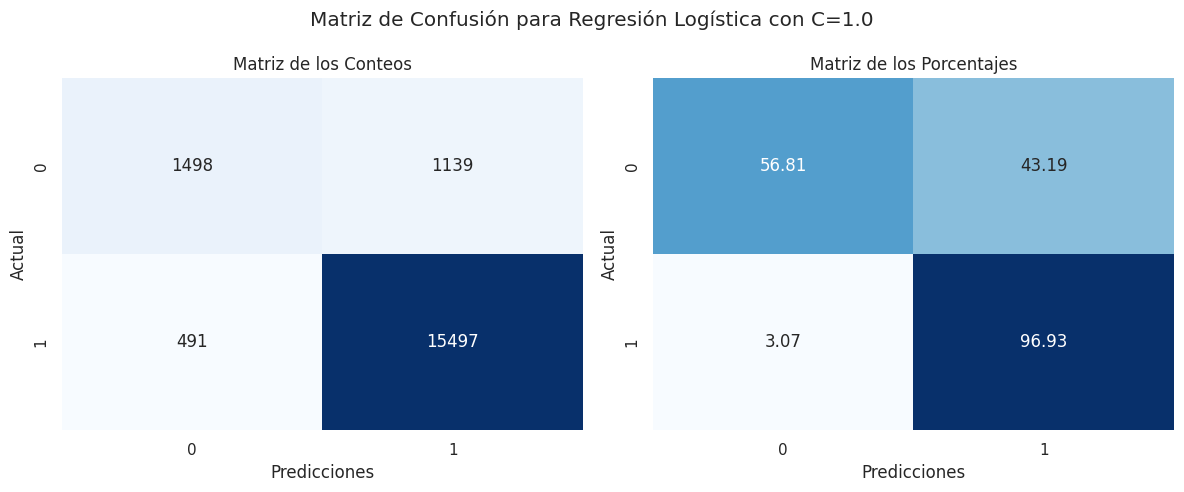

In [16]:
clasificar_y_evaluar(clasificador = "Regresión Logística", n_neighbors=3, c_value_logistic=1.0, c_value_svc=1.0, max_depth=None)

## GUARDAMOS LOS DATOS PARA GENERAR UN PROYECTO BASE DE DESPLIEGUE

In [13]:
import joblib

# Guarda el modelo en un archivo
joblib.dump(trained_model, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

testeamos el modelo desde una carga nueva

In [14]:
# Carga el modelo desde el archivo
model = joblib.load('logistic_regression_model.pkl')

In [19]:
# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(test_data)
# Calcular la precisión
accuracy = accuracy_score(test_label, y_pred)
print(f'Accuracy del clasificador: {accuracy:.2f}')

Accuracy del clasificador: 0.91


In [23]:
test_label.values

array([1, 1, 1, ..., 1, 1, 1], dtype=int8)

In [20]:
test_data

array([[2.03960396e-01, 9.42156728e-01, 0.00000000e+00, ...,
        4.54545455e-01, 3.17757009e-02, 8.86895528e-03],
       [8.11881188e-01, 3.82591929e-01, 0.00000000e+00, ...,
        8.63636364e-01, 0.00000000e+00, 2.36055844e-04],
       [7.96039604e-01, 8.16141027e-01, 0.00000000e+00, ...,
        4.54545455e-01, 1.75700935e-01, 7.11876981e-02],
       ...,
       [6.07920792e-01, 4.82991324e-01, 0.00000000e+00, ...,
        4.09090909e-01, 1.12149533e-02, 1.85472449e-03],
       [4.01980198e-01, 7.38603498e-01, 0.00000000e+00, ...,
        8.63636364e-01, 2.61682243e-02, 3.35873744e-02],
       [5.96039604e-01, 3.20479273e-01, 0.00000000e+00, ...,
        5.00000000e-01, 0.00000000e+00, 2.36055844e-04]])

In [24]:
# Guardar en un archivo
np.save('test_data.npy', test_data)

np.save('test_labels.npy',test_label.values)